# Mall Customer Segmentation using K-means Clustering

## 1. Data Analysis and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load data
df = pd.read_csv('c:/Users/rishi/OneDrive/Desktop/skillcraft/task2/Mall_Customers.csv')

# Select features for clustering: Annual Income and Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Preprocessing: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame for scaled data for convenience
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

## 2. Finding Optimal K
We will use the Elbow Method and Silhouette Score to determine the optimal number of clusters.

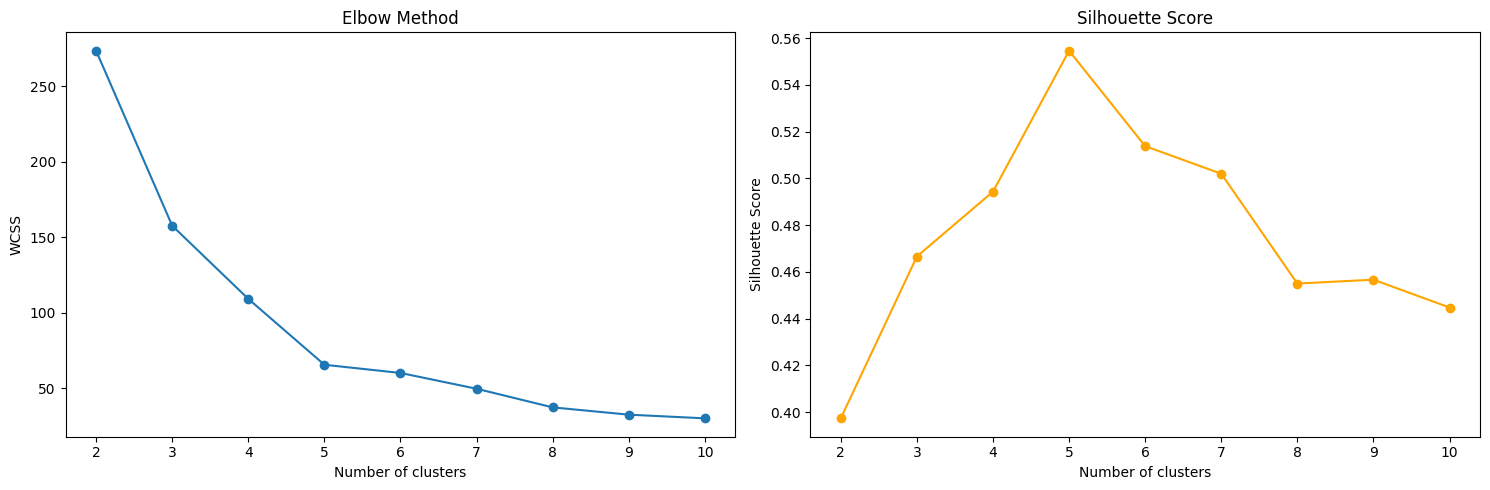

In [2]:
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.savefig('optimization_plots.png')
plt.show()

## 3. Training the Model
Based on the plots (typically K=5 is optimal for this dataset), we will train the final model with K=5.

In [3]:
# Train K-means with K=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = y_kmeans

## 4. Visualizing Clusters
We will visualize the clusters on the original scale.

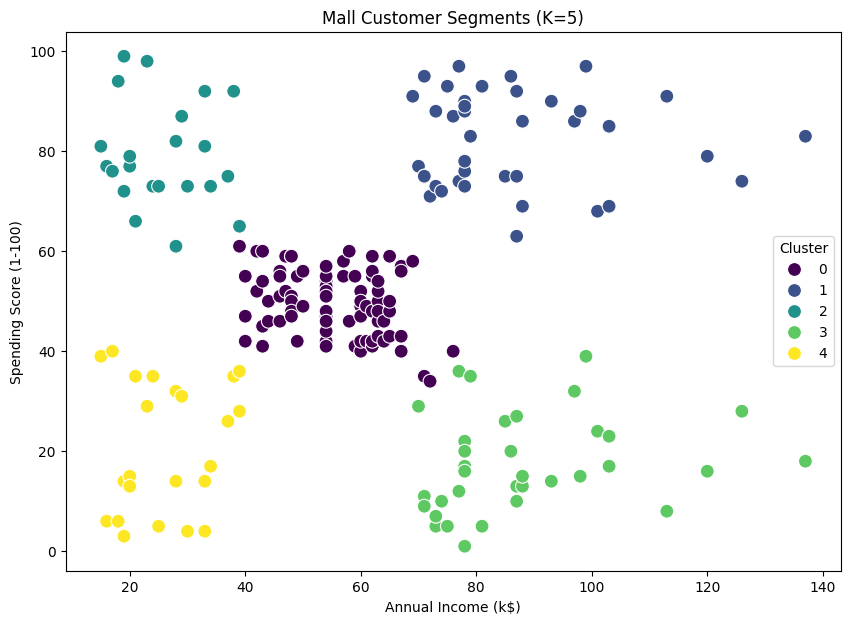

In [4]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title(f'Mall Customer Segments (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.savefig('cluster_visualization.png')
plt.show()

## 5. Cluster Interpretation
Let's analyze the characteristics of each cluster.

In [5]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043
